In [1]:
from utils import *
from metadata import *
from model_utils import *
from gen_imglst import *

import utils
%load_ext autoreload
# %reload_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [3]:
ids={
    "ucomp":8021,
    "flatten3.1200":8013,
    "flatten2.2048":8016,
    "flatten.2048.chk":8020,
    "longtail2.wide":8014,
}

In [107]:
for k,v in ids.iteritems():
    _=shell("wget  http://pavi.parrotsdnn.org/Home/getiters/{}  -O {}.json".format(v,'../output/'+k))

In [211]:
def json2plt(fn,exclude=[]):
    t=read_json(fn)
    df_l=[]
    for tt in t:
#         print tt['label']
        df=pd.DataFrame.from_records(tt['data'],columns=['iter',tt['label']])
    #     df.head()
        
        df.index=df['iter']
        del df['iter']
        df_l.append(df) 

    df=pd.concat(df_l)
    df=df.interpolate(limit_direction='forward') + df.interpolate(limit_direction='backward')
    df=df/2.
    df1=df.copy()
    
    df['iter']=df.index
    df2=df.groupby(lambda x: x//50).mean()
    df2.index=df2['iter'].astype(int)
    del df2['iter']
#     df2=df

    df2=df2.dropna(how='any')
#     df2.head()
    for b,e in exclude:
        df2=df2[np.logical_or(df2.index<b,df2.index>e)]
    
    fig,axes=plt.subplots(figsize=(20,5),ncols=2,nrows=1)
    axes=axes.flatten()
    axes=[axes[i] for i in [0,0,1,0,0,1]]
    df2.plot(subplots=True,ax=axes,marker=None)
    print df1['val/accuracy_top1'].max()
    return df1,df2

../output/flatten.2048.chk.json
0.408342242241


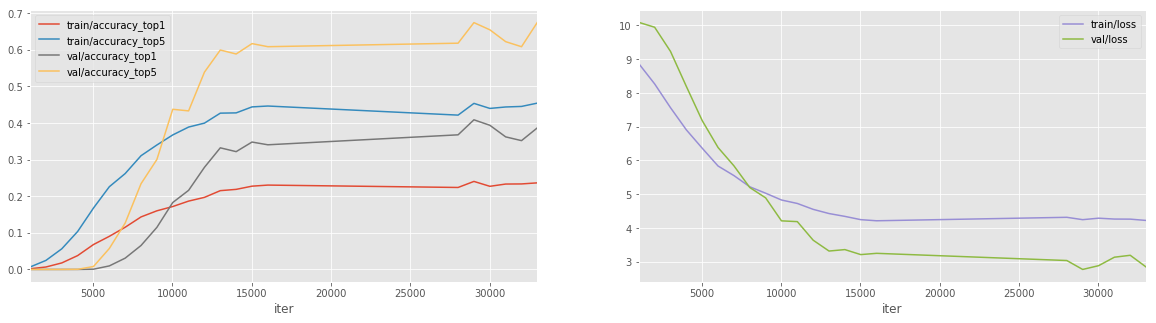

In [212]:
fn=ids.keys()[0]
fn="../output/{}.json".format(fn)
print fn

#     break
df1,df2=json2plt(fn,exclude=[(17000,28000)])


../output/ucomp.json
0.133249163628


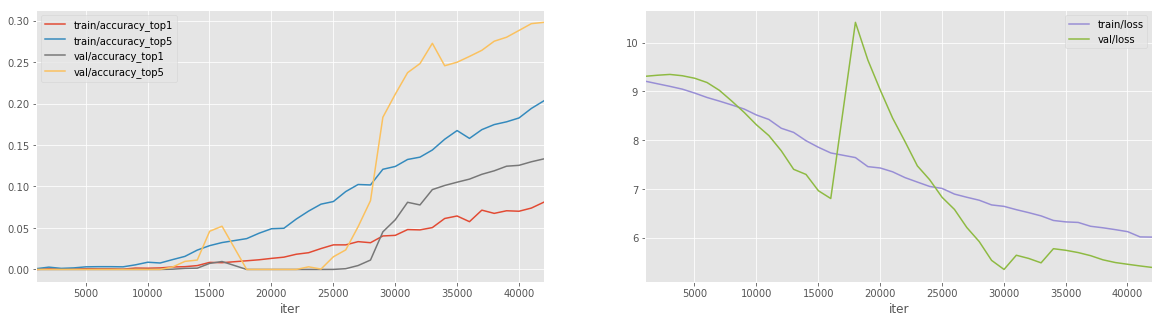

In [213]:
fn=ids.keys()[1]
fn="../output/{}.json".format(fn)
print fn
#     break
df1,df2=json2plt(fn,exclude=[])

../output/longtail2.wide.json
0.00150240387302


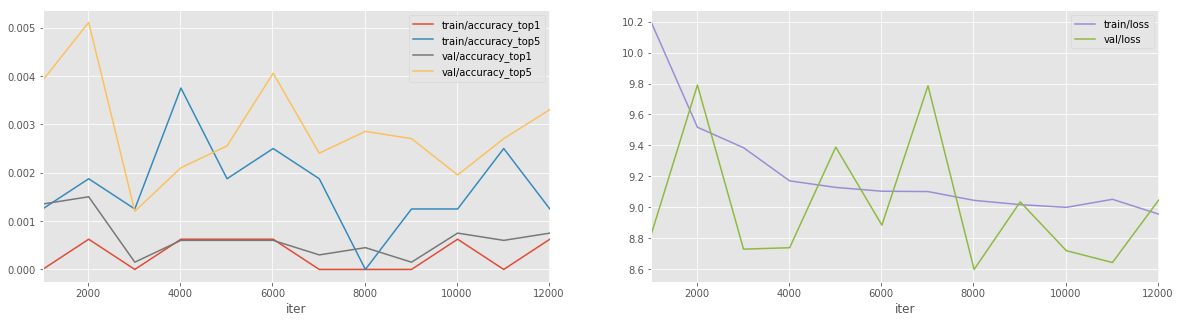

In [217]:
fn=ids.keys()[2]
fn="../output/{}.json".format(fn)
print fn
#     break
df1,df2=json2plt(fn,exclude=[])
plt.figure()
# df1['train/loss'].plot()

../output/flatten2.2048.json
0.433983266354


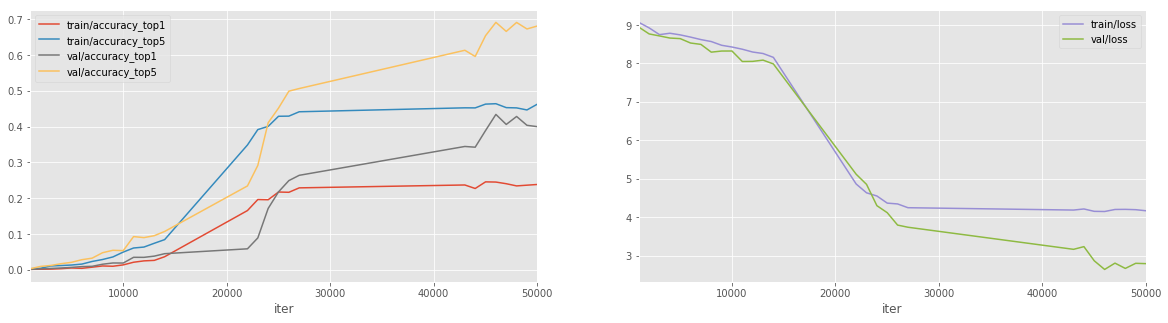

In [215]:
fn=ids.keys()[3]
fn="../output/{}.json".format(fn)
print fn
#     break
df1,df2=json2plt(fn,exclude=[(15000,22000),(28000,43000)])

../output/flatten3.1200.json
0.361153841019


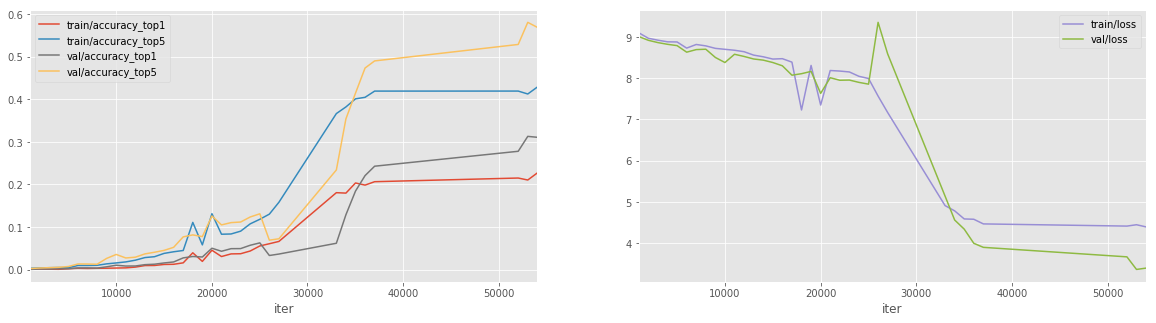

In [216]:
fn=ids.keys()[4]
fn="../output/{}.json".format(fn)
print fn
#     break
df1,df2=json2plt(fn,exclude=[(28000,33000),(38000,52000)])